In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


In [2]:
# input image
IMG = Image.open("BlockZ.png")


In [3]:
# File size
file_size = os.path.getsize("BlockZ.png")
file_size


33171854

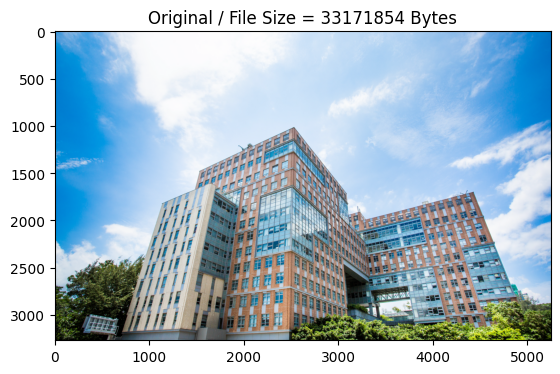

In [4]:
# Plot the orignal image
plt.imshow(IMG)
file_size = os.path.getsize("BlockZ.png")
plt.title("Original / File Size = %s Bytes" % file_size)
plt.show()


In [5]:
# convert image to matrix
IMG_mat = np.array(list(IMG.getdata(band=0)), float)
IMG_mat.shape = (IMG.size[1], IMG.size[0])


In [6]:
IMG_mat


array([[41., 42., 46., ...,  1.,  1.,  1.],
       [44., 44., 47., ...,  1.,  1.,  1.],
       [48., 47., 49., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 24., 27., 28.],
       [ 0.,  0.,  0., ..., 24., 26., 28.],
       [ 0.,  1.,  1., ..., 11., 14., 17.]])

In [7]:
# Image Matrix Size
IMG_mat.shape


(3270, 5252)

In [8]:
# Singular Value Decomposition
U, S, V = np.linalg.svd(IMG_mat)


In [9]:
S


array([6.31006815e+05, 1.38126881e+05, 7.45145329e+04, ...,
       4.64223323e+00, 6.25108409e-13, 3.17181497e-13])

In [10]:
U


array([[ 2.14967945e-02,  1.70489299e-02,  2.86819329e-02, ...,
         4.49082432e-02,  1.96594643e-16,  4.14040442e-17],
       [ 2.14960841e-02,  1.70729029e-02,  2.87500255e-02, ...,
        -7.24750643e-02,  6.00132385e-16, -2.44131556e-16],
       [ 2.14951289e-02,  1.70946558e-02,  2.88537688e-02, ...,
         2.11577137e-02, -1.62353304e-15,  4.70452378e-16],
       ...,
       [ 9.37576803e-03, -5.13146727e-03, -5.73062437e-03, ...,
         1.06207609e-04, -4.48684888e-17, -3.70145522e-17],
       [ 9.43221806e-03, -5.31455463e-03, -6.25507506e-03, ...,
         2.57635805e-04,  1.92380154e-17,  6.84674274e-17],
       [ 9.39771518e-03, -5.20323045e-03, -6.10529017e-03, ...,
        -3.01210515e-04,  1.41675954e-17, -3.27812561e-17]])

In [11]:
V


array([[ 0.00362079,  0.00359896,  0.00356702, ...,  0.00856711,
         0.00858429,  0.00859423],
       [-0.01818176, -0.01805862, -0.01785967, ..., -0.03145253,
        -0.03145437, -0.03143914],
       [ 0.02936589,  0.0292732 ,  0.02913485, ..., -0.02141682,
        -0.02171893, -0.02192617],
       ...,
       [ 0.00243371,  0.00259979, -0.01868834, ...,  0.55822331,
        -0.14976734, -0.06329737],
       [ 0.00648851, -0.00990699, -0.013696  , ..., -0.14807794,
         0.59352479, -0.26582088],
       [ 0.00266312, -0.01972931, -0.00788281, ..., -0.07725323,
        -0.24176482,  0.36868007]])

In [12]:
# The first 20 singular values
S[0:20]


array([631006.81455942, 138126.88083771,  74514.53293722,  65774.8284948 ,
        47194.15817653,  42252.78425877,  36042.391488  ,  33711.67034766,
        31731.44505518,  30628.32867095,  28167.63241095,  24362.79943119,
        23544.0146469 ,  22097.54710818,  21679.11227081,  21205.36058633,
        20821.25443068,  19690.55829279,  19479.97587518,  18016.81170178])

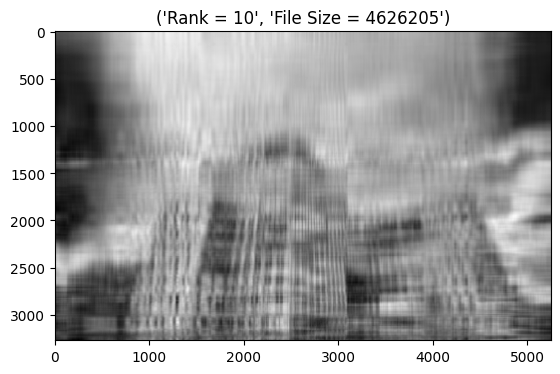

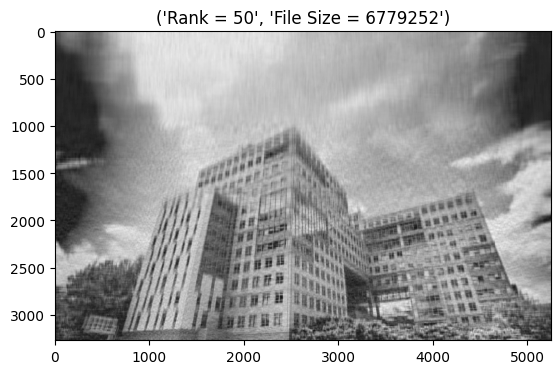

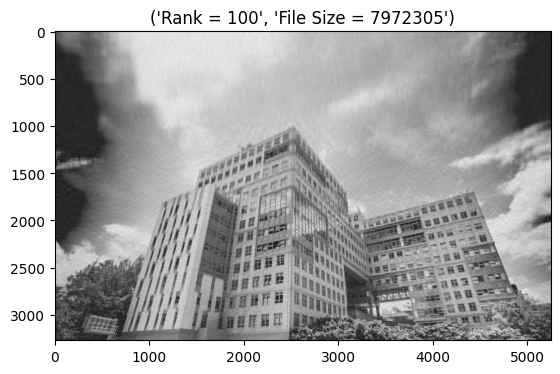

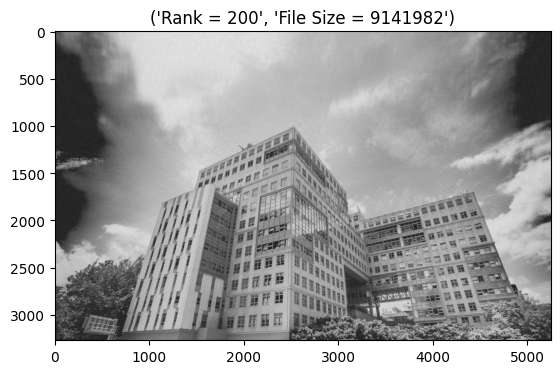

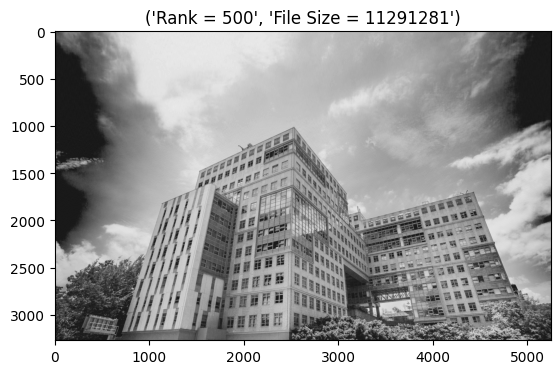

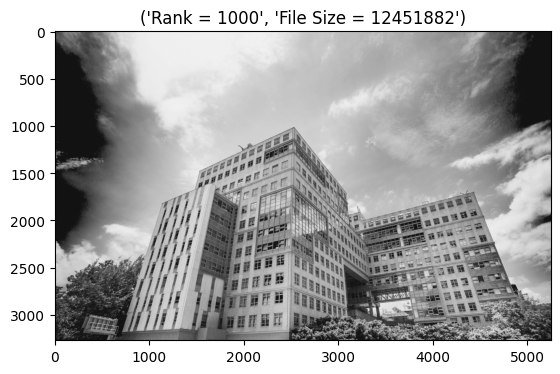

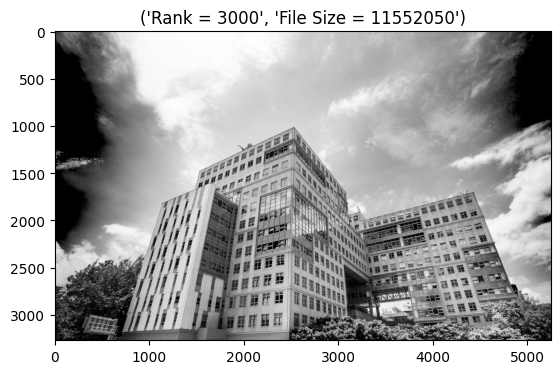

In [13]:
# Low-rank approximation for different rank
import matplotlib

list = [10, 50, 100, 200, 500, 1000, 3000]
for i in list:
    IMG_approx = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(V[:i, :])
    filename = "BlockZ_%s.png" % i
    matplotlib.image.imsave(filename, IMG_approx, cmap="gray")
    file_size = os.path.getsize(filename)
    plt.imshow(IMG_approx, cmap="gray")
    title = "Rank = %s" % i, "File Size = %s" % file_size
    plt.title(title)
    plt.show()
